# Natural Language Processing	
1.Using NLP predict whether the review is positive or negative for a given dataset 


In [1]:
# Natural Language Processing
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pickle
import os
import nltk


from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

# precision recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature


# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing the dataset

dataset = pd.read_csv("Dataset/Restaurant_Reviews.tsv",delimiter = "\t",quoting= 3)

In [3]:
print("dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1]))

dataset has 1000 rows and 2 Columns


In [4]:
# checking the head of the data

dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
print("Before Stemming review \n",dataset['Review'].head())

Before Stemming review 
 0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: Review, dtype: object


# Stemming

"Stemming is the process of reducing inflection in words to their root forms 
such as mapping a group of words to the same stem even if the stem itself is not a 
valid word in the Language."

Stem (root) is the part of the word to which you add inflectional (changing/deriving) affixes 
such as (-ed,-ize, -s,-de,mis). So stemming a word or sentence may result in words that are not actual words.
Stems are created by removing the suffixes or prefixes used with a word.

In [13]:
# library to clean data 
import re 

# Natural Language Tool Kit 
import nltk 

nltk.download('stopwords') 

# to remove stopword 
from nltk.corpus import stopwords 

# for Stemming propose 
from nltk.stem.porter import PorterStemmer 

# Initialize empty array 
# to append clean text 
corpus = [] 

# 1000 (reviews) rows to clean 
for i in range(0, 1000): 
    
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
    
    # convert all cases to lower cases 
    review = review.lower() 
    
    # split to array(default delimiter is " ") 
    review = review.split() 
    
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer() 
    
    # loop for stemming each word 
    # in string array at ith row	 
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))] 
                
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review) 
    
    # append each string to create 
    # array of clean text 
    corpus.append(review) 


[nltk_data] Downloading package stopwords to /home/admin1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Bag Of Words Model:

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.

In [14]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 

# To extract max 1500 feature. 
# "max_features" is attribute to 
# experiment with to get better results 
cv = CountVectorizer(max_features = 1500) 

# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray() 

# y contains answers if review 
# is positive or negative 
y = dataset.iloc[:, 1].values 


In [15]:
# Splitting the dataset into 
# the Training set and Test set 
from sklearn.model_selection import train_test_split 

# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 


In [16]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 

# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results 
model = RandomForestClassifier(n_estimators = 501,criterion = 'entropy') 

model.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=501, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
# Predicting the Test set results 
y_pred = model.predict(X_test) 


In [18]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 

cm 


array([[115,  29],
       [ 41,  65]])

In [19]:

Accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: accuracy_score :", Accuracy)
        
accuracy = average_precision_score(y_test, y_pred)* 100
print("Accuracy: average_precision_score :", accuracy)

print("\n",classification_report(y_test, y_pred))


Accuracy: accuracy_score : 72.0
Accuracy: average_precision_score : 58.80264953833802

               precision    recall  f1-score   support

           0       0.74      0.80      0.77       144
           1       0.69      0.61      0.65       106

   micro avg       0.72      0.72      0.72       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.72      0.72      0.72       250




 ROC curve 



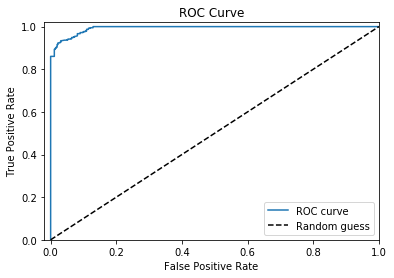

In [22]:
y_pred_prob = classifier.predict_proba(X_train)[:,1]

print("\n ROC curve \n")
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")


## Fitting Naive Bayes to the Training set


 confusion matrix 
 [[356   0]
 [ 56 338]]

 Accuracy: average_precision_score : 93.25346869712352
Accuracy: accuracy_score :
 92.53333333333333

 Accuracy: average_precision_score : 93.25346869712352

               precision    recall  f1-score   support

           0       0.86      1.00      0.93       356
           1       1.00      0.86      0.92       394

   micro avg       0.93      0.93      0.93       750
   macro avg       0.93      0.93      0.93       750
weighted avg       0.94      0.93      0.93       750


 ROC curve 



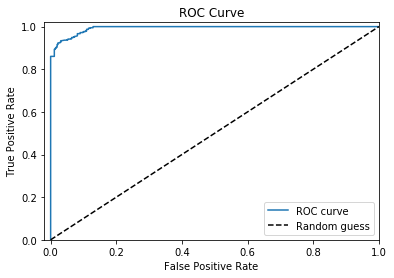

In [20]:
# # Feature Scaling

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Fitting Naive Bayes to the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_train)

# Making the Confusion Matrix

cm = confusion_matrix(y_train, y_pred)
print("\n confusion matrix \n",cm)

accuracy = average_precision_score(y_train, y_pred)* 100
print("\n Accuracy: average_precision_score :", accuracy)

Accuracy = accuracy_score(y_train, y_pred)*100
print("Accuracy: accuracy_score :\n", Accuracy)
        
accuracy = average_precision_score(y_train, y_pred)* 100
print("\n Accuracy: average_precision_score :", accuracy)


print("\n",classification_report(y_train, y_pred))

y_pred_prob = classifier.predict_proba(X_train)[:,1]

print("\n ROC curve \n")
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")


save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

### Prediction on test dataset

confusion matrix 
  [[114  30]
 [ 34  72]]
Accuracy: accuracy_score : 74.4
Accuracy: average_precision_score : 61.546725860155384

               precision    recall  f1-score   support

           0       0.77      0.79      0.78       144
           1       0.71      0.68      0.69       106

   micro avg       0.74      0.74      0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



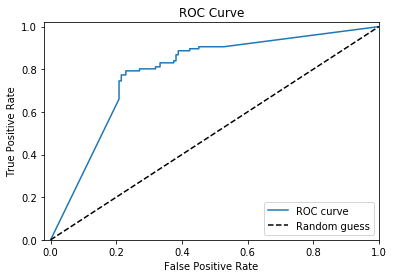

In [21]:
# dump train model pickle file
file = open('naivebayes.pickle', 'rb')
pickle_in = pickle.load(file)

# Predicting the Test set results
y_pred = pickle_in.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusion matrix \n ",cm)


Accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy: accuracy_score :", Accuracy)
        
accuracy = average_precision_score(y_test, y_pred)* 100
print("Accuracy: average_precision_score :", accuracy)

print("\n",classification_report(y_test, y_pred))

y_pred_prob = pickle_in.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")